# AOS_comCam_inspect

Read all images, save individual sensors as well as entire raft from cameraGeom. Overlay arrows 

In [14]:
import os
# show the raw image 
from lsst.daf import butler as dafButler
import lsst.afw.cameraGeom.utils as cameraGeomUtils
import lsst.afw.display as afwDisplay

import matplotlib.pyplot as plt
from matplotlib import rcParams 
from astropy.io import fits
from astropy.visualization import ZScaleInterval

from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

In [12]:
import run_ps1_functions as func
import imp
imp.reload(func)

<module 'run_ps1_functions' from '/home/scichris/notebooks/run_ps1_functions.py'>

'9000031'

9003231


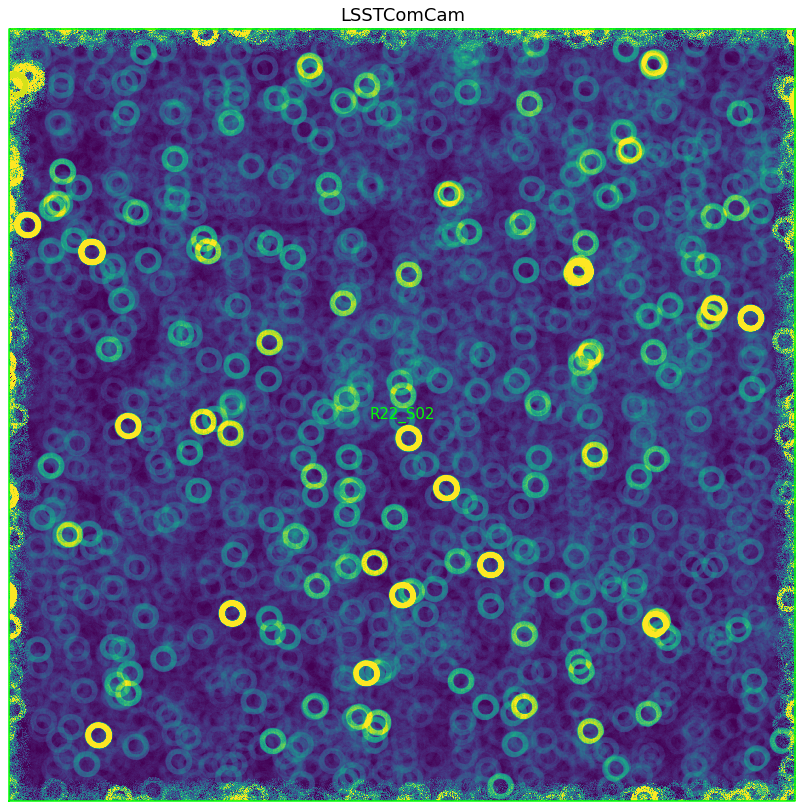

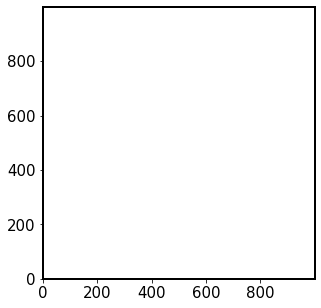

In [58]:
instrument='LSSTCam'

instr = 'comCam'
field = 'Baade'
position = 'intra'
obshistid = func.calculate_obshistid(instr, field, position ,'qckBkgndPert05_NCSA.cmd',1)
print(obshistid)
repo_dir = f'/project/scichris/aos/AOS/DM-28360/{instr}/{field}/{position}/{obshistid}/DATA/'

mos = func.plot_cameraGeom(repo_dir = repo_dir, detectorNameList=['R22_S02'],
                          instrument='LSSTComCam', binSize=1)  # in DVCS 
#fig,ax = plt.subplots(1,1,figsize=(15,15))
zscale = ZScaleInterval()
vmin, vmax = zscale.get_limits(mos.array)

# in CCS 
# ax.imshow(mos.array.T, origin='lower', vmax=vmax, vmin=vmin,cmap='gray')
# plt.savefig(f'{instr}_{field}_{position}_Pert05_qck.png', bbox_inches='tight', )

fig,ax = plt.subplots(1,1,figsize=(5,5))
# in DVCS so it does not cause confusion... 
ax.imshow(mos.array[:1000,:1000], origin='lower', vmax=650, vmin=vmin,cmap='gray')
plt.title('')
plt.savefig(f'{instr}_{field}_{position}_Pert05_qck.png', bbox_inches='tight', )




In [61]:
vmax

34002.13297231647

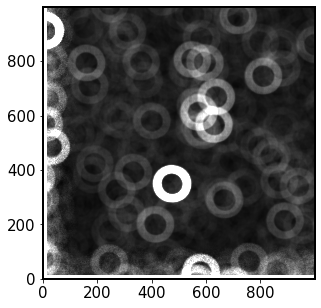

In [69]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
# in DVCS so it does not cause confusion... 
ax.imshow(mos.array[:1000,:1000], origin='lower', vmax=8000, vmin=500,cmap='gray')
plt.title('')
plt.savefig(f'{instr}_{field}_{position}_Pert05_qck.png', bbox_inches='tight', )


Print count of stars in the input catalog, which spans the size of the raft 

In [52]:
import pandas as pd
import numpy as np
for field in ['high','med','low','Baade']:
    obshistid = func.calculate_obshistid(instr, field, position ,'qckBkgndPert05_NCSA.cmd',1)
    inst_file = os.path.join('/project/scichris/aos/AOS/DM-28360/',
                             f'stars_{instr}_PS1_{field}_{position}_{obshistid}.inst'
                            )
    cat = np.genfromtxt(inst_file,skip_header=16)
    cat_df = pd.DataFrame(cat[:, 1:5], columns=['id', 'ra', 'dec', 'g'])
    print(field,len(cat_df))


high 5541
med 9831
low 281084
Baade 412463


In [50]:
cat

array([[           nan, 7.18027042e+16, 2.70421760e+02, ...,
        1.20000000e+01,            nan,            nan],
       [           nan, 7.18327042e+16, 2.70421762e+02, ...,
        1.20000000e+01,            nan,            nan],
       [           nan, 7.18327042e+16, 2.70421765e+02, ...,
        1.20000000e+01,            nan,            nan],
       ...,
       [           nan, 7.23627135e+16, 2.71345831e+02, ...,
        1.20000000e+01,            nan,            nan],
       [           nan, 7.18827135e+16, 2.71345835e+02, ...,
        1.20000000e+01,            nan,            nan],
       [           nan, 7.15727135e+16, 2.71345841e+02, ...,
        1.20000000e+01,            nan,            nan]])

In [ ]:
I found that there are Baade files that are repackaged, but not ingested into a Butler repo...


cp 

/extra/9003101/
/extra/9003131/
/extra/9003111/
/extra/9003121/

/focal/9003011/ - 
/focal/9003021/
/focal/9003001/ - done 
/focal/9003031/ - done

/intra/9003221/- done 
/intra/9003231/ - done 
/intra/9003211/ - done 
/intra/9003201/DATA/ - done 


AttributeError: module 'matplotlib.pyplot' has no attribute 'tit'

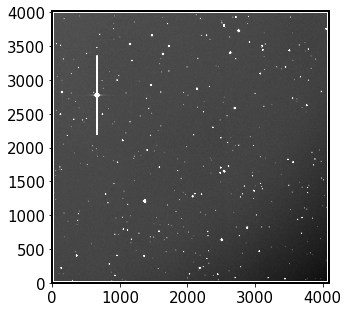

In [33]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.imshow(mos.array, origin='lower', vmax=650, vmin=vmin,cmap='gray')
plt.title('')
plt.savefig(f'{instr}_{field}_{position}_Pert05_qck.png', bbox_inches='tight', )


In [29]:
vmax

571.84924

Resolve locations https://confluence.lsstcorp.org/display/LTS/Catalogs+and+images+for+AOS+testing in `/project/scichris/aos/AOS/DM-28360/comCam/`:
        
        {high,med,low,Baade} x {focal,extra,intra} x {noBkgnd,qckBkgnd} x {Pert00,Pert05}
        
With OPD stored in `/project/scichris/aos/AOS/DM-28360/comCam/opd/`